# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 다층 퍼셉트론 모델

In [1]:
# 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [17]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [19]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [20]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [21]:
# 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [22]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)

W0822 10:45:01.002624  4220 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 10:45:01.047626  4220 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2000
 - 0s - loss: 2.4745 - acc: 0.2000
Epoch 2/2000
 - 0s - loss: 2.4529 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.4253 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3909 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3440 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2906 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.2313 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.1544 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 2.0726 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 2.0296 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9876 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9682 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9524 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9436 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9326 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9282 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9212 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9135 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9098 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9067 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

Epoch 168/2000
 - 0s - loss: 1.6509 - acc: 0.3800
Epoch 169/2000
 - 0s - loss: 1.6464 - acc: 0.4000
Epoch 170/2000
 - 0s - loss: 1.6501 - acc: 0.4000
Epoch 171/2000
 - 0s - loss: 1.6459 - acc: 0.4000
Epoch 172/2000
 - 0s - loss: 1.6439 - acc: 0.4000
Epoch 173/2000
 - 0s - loss: 1.6423 - acc: 0.3800
Epoch 174/2000
 - 0s - loss: 1.6412 - acc: 0.3800
Epoch 175/2000
 - 0s - loss: 1.6385 - acc: 0.3800
Epoch 176/2000
 - 0s - loss: 1.6374 - acc: 0.4000
Epoch 177/2000
 - 0s - loss: 1.6359 - acc: 0.4000
Epoch 178/2000
 - 0s - loss: 1.6356 - acc: 0.4000
Epoch 179/2000
 - 0s - loss: 1.6330 - acc: 0.4000
Epoch 180/2000
 - 0s - loss: 1.6282 - acc: 0.4000
Epoch 181/2000
 - 0s - loss: 1.6305 - acc: 0.4000
Epoch 182/2000
 - 0s - loss: 1.6312 - acc: 0.4000
Epoch 183/2000
 - 0s - loss: 1.6282 - acc: 0.4000
Epoch 184/2000
 - 0s - loss: 1.6233 - acc: 0.4000
Epoch 185/2000
 - 0s - loss: 1.6216 - acc: 0.4000
Epoch 186/2000
 - 0s - loss: 1.6180 - acc: 0.4200
Epoch 187/2000
 - 0s - loss: 1.6163 - acc: 0.4400


Epoch 332/2000
 - 0s - loss: 1.5149 - acc: 0.4600
Epoch 333/2000
 - 0s - loss: 1.5295 - acc: 0.4800
Epoch 334/2000
 - 0s - loss: 1.5156 - acc: 0.4800
Epoch 335/2000
 - 0s - loss: 1.5122 - acc: 0.4800
Epoch 336/2000
 - 0s - loss: 1.5135 - acc: 0.4600
Epoch 337/2000
 - 0s - loss: 1.5152 - acc: 0.4600
Epoch 338/2000
 - 0s - loss: 1.5127 - acc: 0.4600
Epoch 339/2000
 - 0s - loss: 1.5170 - acc: 0.4600
Epoch 340/2000
 - 0s - loss: 1.5144 - acc: 0.4800
Epoch 341/2000
 - 0s - loss: 1.5203 - acc: 0.4400
Epoch 342/2000
 - 0s - loss: 1.5118 - acc: 0.4400
Epoch 343/2000
 - 0s - loss: 1.5108 - acc: 0.4600
Epoch 344/2000
 - 0s - loss: 1.5138 - acc: 0.4800
Epoch 345/2000
 - 0s - loss: 1.5081 - acc: 0.4800
Epoch 346/2000
 - 0s - loss: 1.5165 - acc: 0.4600
Epoch 347/2000
 - 0s - loss: 1.5074 - acc: 0.4600
Epoch 348/2000
 - 0s - loss: 1.5082 - acc: 0.4800
Epoch 349/2000
 - 0s - loss: 1.5165 - acc: 0.4600
Epoch 350/2000
 - 0s - loss: 1.5084 - acc: 0.4600
Epoch 351/2000
 - 0s - loss: 1.5070 - acc: 0.4600


Epoch 496/2000
 - 0s - loss: 1.4543 - acc: 0.4400
Epoch 497/2000
 - 0s - loss: 1.4490 - acc: 0.4400
Epoch 498/2000
 - 0s - loss: 1.4531 - acc: 0.4400
Epoch 499/2000
 - 0s - loss: 1.4506 - acc: 0.4400
Epoch 500/2000
 - 0s - loss: 1.4523 - acc: 0.4400
Epoch 501/2000
 - 0s - loss: 1.4521 - acc: 0.4600
Epoch 502/2000
 - 0s - loss: 1.4523 - acc: 0.4400
Epoch 503/2000
 - 0s - loss: 1.4497 - acc: 0.4400
Epoch 504/2000
 - 0s - loss: 1.4459 - acc: 0.4400
Epoch 505/2000
 - 0s - loss: 1.4492 - acc: 0.4400
Epoch 506/2000
 - 0s - loss: 1.4460 - acc: 0.4400
Epoch 507/2000
 - 0s - loss: 1.4438 - acc: 0.4400
Epoch 508/2000
 - 0s - loss: 1.4509 - acc: 0.4600
Epoch 509/2000
 - 0s - loss: 1.4445 - acc: 0.4400
Epoch 510/2000
 - 0s - loss: 1.4445 - acc: 0.4400
Epoch 511/2000
 - 0s - loss: 1.4511 - acc: 0.4600
Epoch 512/2000
 - 0s - loss: 1.4433 - acc: 0.4600
Epoch 513/2000
 - 0s - loss: 1.4417 - acc: 0.4400
Epoch 514/2000
 - 0s - loss: 1.4422 - acc: 0.4400
Epoch 515/2000
 - 0s - loss: 1.4407 - acc: 0.4400


Epoch 660/2000
 - 0s - loss: 1.3663 - acc: 0.4600
Epoch 661/2000
 - 0s - loss: 1.3702 - acc: 0.4200
Epoch 662/2000
 - 0s - loss: 1.3743 - acc: 0.3800
Epoch 663/2000
 - 0s - loss: 1.3682 - acc: 0.3800
Epoch 664/2000
 - 0s - loss: 1.3681 - acc: 0.4600
Epoch 665/2000
 - 0s - loss: 1.3657 - acc: 0.4800
Epoch 666/2000
 - 0s - loss: 1.3761 - acc: 0.4600
Epoch 667/2000
 - 0s - loss: 1.3703 - acc: 0.4600
Epoch 668/2000
 - 0s - loss: 1.3687 - acc: 0.4800
Epoch 669/2000
 - 0s - loss: 1.3724 - acc: 0.4000
Epoch 670/2000
 - 0s - loss: 1.3693 - acc: 0.4200
Epoch 671/2000
 - 0s - loss: 1.3664 - acc: 0.4600
Epoch 672/2000
 - 0s - loss: 1.3615 - acc: 0.5000
Epoch 673/2000
 - 0s - loss: 1.3627 - acc: 0.4800
Epoch 674/2000
 - 0s - loss: 1.3619 - acc: 0.4400
Epoch 675/2000
 - 0s - loss: 1.3635 - acc: 0.4400
Epoch 676/2000
 - 0s - loss: 1.3614 - acc: 0.4600
Epoch 677/2000
 - 0s - loss: 1.3592 - acc: 0.4600
Epoch 678/2000
 - 0s - loss: 1.3686 - acc: 0.4000
Epoch 679/2000
 - 0s - loss: 1.3589 - acc: 0.4400


Epoch 824/2000
 - 0s - loss: 1.2990 - acc: 0.5000
Epoch 825/2000
 - 0s - loss: 1.3053 - acc: 0.4800
Epoch 826/2000
 - 0s - loss: 1.3063 - acc: 0.4800
Epoch 827/2000
 - 0s - loss: 1.3106 - acc: 0.4200
Epoch 828/2000
 - 0s - loss: 1.3041 - acc: 0.4600
Epoch 829/2000
 - 0s - loss: 1.3028 - acc: 0.4400
Epoch 830/2000
 - 0s - loss: 1.3010 - acc: 0.4800
Epoch 831/2000
 - 0s - loss: 1.2975 - acc: 0.5200
Epoch 832/2000
 - 0s - loss: 1.3001 - acc: 0.4800
Epoch 833/2000
 - 0s - loss: 1.3025 - acc: 0.4600
Epoch 834/2000
 - 0s - loss: 1.3025 - acc: 0.5200
Epoch 835/2000
 - 0s - loss: 1.3022 - acc: 0.5000
Epoch 836/2000
 - 0s - loss: 1.3004 - acc: 0.4200
Epoch 837/2000
 - 0s - loss: 1.3080 - acc: 0.4800
Epoch 838/2000
 - 0s - loss: 1.3010 - acc: 0.4800
Epoch 839/2000
 - 0s - loss: 1.2955 - acc: 0.4600
Epoch 840/2000
 - 0s - loss: 1.2984 - acc: 0.4800
Epoch 841/2000
 - 0s - loss: 1.2954 - acc: 0.4600
Epoch 842/2000
 - 0s - loss: 1.2983 - acc: 0.4600
Epoch 843/2000
 - 0s - loss: 1.2975 - acc: 0.4800


Epoch 988/2000
 - 0s - loss: 1.2690 - acc: 0.5000
Epoch 989/2000
 - 0s - loss: 1.2580 - acc: 0.4800
Epoch 990/2000
 - 0s - loss: 1.2468 - acc: 0.5400
Epoch 991/2000
 - 0s - loss: 1.2489 - acc: 0.5000
Epoch 992/2000
 - 0s - loss: 1.2433 - acc: 0.5600
Epoch 993/2000
 - 0s - loss: 1.2382 - acc: 0.5600
Epoch 994/2000
 - 0s - loss: 1.2443 - acc: 0.5600
Epoch 995/2000
 - 0s - loss: 1.2414 - acc: 0.5400
Epoch 996/2000
 - 0s - loss: 1.2410 - acc: 0.5400
Epoch 997/2000
 - 0s - loss: 1.2457 - acc: 0.5600
Epoch 998/2000
 - 0s - loss: 1.2480 - acc: 0.5600
Epoch 999/2000
 - 0s - loss: 1.2489 - acc: 0.5200
Epoch 1000/2000
 - 0s - loss: 1.2432 - acc: 0.5000
Epoch 1001/2000
 - 0s - loss: 1.2497 - acc: 0.4800
Epoch 1002/2000
 - 0s - loss: 1.2407 - acc: 0.5600
Epoch 1003/2000
 - 0s - loss: 1.2375 - acc: 0.5400
Epoch 1004/2000
 - 0s - loss: 1.2354 - acc: 0.5400
Epoch 1005/2000
 - 0s - loss: 1.2339 - acc: 0.5600
Epoch 1006/2000
 - 0s - loss: 1.2329 - acc: 0.5200
Epoch 1007/2000
 - 0s - loss: 1.2453 - acc:

Epoch 1149/2000
 - 0s - loss: 1.1783 - acc: 0.5600
Epoch 1150/2000
 - 0s - loss: 1.1832 - acc: 0.5800
Epoch 1151/2000
 - 0s - loss: 1.1749 - acc: 0.5800
Epoch 1152/2000
 - 0s - loss: 1.1810 - acc: 0.5200
Epoch 1153/2000
 - 0s - loss: 1.1763 - acc: 0.5400
Epoch 1154/2000
 - 0s - loss: 1.1777 - acc: 0.5600
Epoch 1155/2000
 - 0s - loss: 1.1746 - acc: 0.5800
Epoch 1156/2000
 - 0s - loss: 1.1809 - acc: 0.5800
Epoch 1157/2000
 - 0s - loss: 1.1779 - acc: 0.5200
Epoch 1158/2000
 - 0s - loss: 1.1730 - acc: 0.5600
Epoch 1159/2000
 - 0s - loss: 1.1747 - acc: 0.5600
Epoch 1160/2000
 - 0s - loss: 1.1794 - acc: 0.5800
Epoch 1161/2000
 - 0s - loss: 1.1729 - acc: 0.5800
Epoch 1162/2000
 - 0s - loss: 1.1753 - acc: 0.5800
Epoch 1163/2000
 - 0s - loss: 1.1836 - acc: 0.5800
Epoch 1164/2000
 - 0s - loss: 1.1748 - acc: 0.5800
Epoch 1165/2000
 - 0s - loss: 1.1743 - acc: 0.5400
Epoch 1166/2000
 - 0s - loss: 1.1721 - acc: 0.5800
Epoch 1167/2000
 - 0s - loss: 1.1741 - acc: 0.5600
Epoch 1168/2000
 - 0s - loss: 1

Epoch 1310/2000
 - 0s - loss: 1.1166 - acc: 0.5800
Epoch 1311/2000
 - 0s - loss: 1.1182 - acc: 0.5800
Epoch 1312/2000
 - 0s - loss: 1.1194 - acc: 0.5400
Epoch 1313/2000
 - 0s - loss: 1.1170 - acc: 0.5600
Epoch 1314/2000
 - 0s - loss: 1.1167 - acc: 0.5800
Epoch 1315/2000
 - 0s - loss: 1.1247 - acc: 0.5800
Epoch 1316/2000
 - 0s - loss: 1.1215 - acc: 0.5600
Epoch 1317/2000
 - 0s - loss: 1.1166 - acc: 0.5600
Epoch 1318/2000
 - 0s - loss: 1.1290 - acc: 0.5600
Epoch 1319/2000
 - 0s - loss: 1.1160 - acc: 0.5800
Epoch 1320/2000
 - 0s - loss: 1.1184 - acc: 0.5600
Epoch 1321/2000
 - 0s - loss: 1.1163 - acc: 0.5600
Epoch 1322/2000
 - 0s - loss: 1.1108 - acc: 0.5400
Epoch 1323/2000
 - 0s - loss: 1.1176 - acc: 0.5600
Epoch 1324/2000
 - 0s - loss: 1.1076 - acc: 0.5600
Epoch 1325/2000
 - 0s - loss: 1.1163 - acc: 0.5600
Epoch 1326/2000
 - 0s - loss: 1.1123 - acc: 0.5600
Epoch 1327/2000
 - 0s - loss: 1.1126 - acc: 0.5400
Epoch 1328/2000
 - 0s - loss: 1.1128 - acc: 0.5800
Epoch 1329/2000
 - 0s - loss: 1

Epoch 1471/2000
 - 0s - loss: 1.0549 - acc: 0.5400
Epoch 1472/2000
 - 0s - loss: 1.0687 - acc: 0.5600
Epoch 1473/2000
 - 0s - loss: 1.0536 - acc: 0.5600
Epoch 1474/2000
 - 0s - loss: 1.0615 - acc: 0.6000
Epoch 1475/2000
 - 0s - loss: 1.0535 - acc: 0.6000
Epoch 1476/2000
 - 0s - loss: 1.0524 - acc: 0.5400
Epoch 1477/2000
 - 0s - loss: 1.0550 - acc: 0.5600
Epoch 1478/2000
 - 0s - loss: 1.0533 - acc: 0.6200
Epoch 1479/2000
 - 0s - loss: 1.0546 - acc: 0.5800
Epoch 1480/2000
 - 0s - loss: 1.0483 - acc: 0.5600
Epoch 1481/2000
 - 0s - loss: 1.0540 - acc: 0.5400
Epoch 1482/2000
 - 0s - loss: 1.0549 - acc: 0.5400
Epoch 1483/2000
 - 0s - loss: 1.0534 - acc: 0.5600
Epoch 1484/2000
 - 0s - loss: 1.0586 - acc: 0.5800
Epoch 1485/2000
 - 0s - loss: 1.0433 - acc: 0.5400
Epoch 1486/2000
 - 0s - loss: 1.0545 - acc: 0.5400
Epoch 1487/2000
 - 0s - loss: 1.0611 - acc: 0.5200
Epoch 1488/2000
 - 0s - loss: 1.0519 - acc: 0.5400
Epoch 1489/2000
 - 0s - loss: 1.0562 - acc: 0.6400
Epoch 1490/2000
 - 0s - loss: 1

Epoch 1632/2000
 - 0s - loss: 1.0063 - acc: 0.6200
Epoch 1633/2000
 - 0s - loss: 1.0021 - acc: 0.6000
Epoch 1634/2000
 - 0s - loss: 0.9963 - acc: 0.6200
Epoch 1635/2000
 - 0s - loss: 1.0019 - acc: 0.5800
Epoch 1636/2000
 - 0s - loss: 0.9938 - acc: 0.6400
Epoch 1637/2000
 - 0s - loss: 0.9996 - acc: 0.6600
Epoch 1638/2000
 - 0s - loss: 0.9907 - acc: 0.5800
Epoch 1639/2000
 - 0s - loss: 1.0034 - acc: 0.6400
Epoch 1640/2000
 - 0s - loss: 1.0012 - acc: 0.6400
Epoch 1641/2000
 - 0s - loss: 1.0032 - acc: 0.6000
Epoch 1642/2000
 - 0s - loss: 0.9941 - acc: 0.6200
Epoch 1643/2000
 - 0s - loss: 1.0003 - acc: 0.6000
Epoch 1644/2000
 - 0s - loss: 0.9919 - acc: 0.6000
Epoch 1645/2000
 - 0s - loss: 0.9925 - acc: 0.6000
Epoch 1646/2000
 - 0s - loss: 0.9931 - acc: 0.6000
Epoch 1647/2000
 - 0s - loss: 1.0018 - acc: 0.6000
Epoch 1648/2000
 - 0s - loss: 1.0005 - acc: 0.6200
Epoch 1649/2000
 - 0s - loss: 0.9982 - acc: 0.6200
Epoch 1650/2000
 - 0s - loss: 0.9899 - acc: 0.6200
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.9404 - acc: 0.6400
Epoch 1794/2000
 - 0s - loss: 0.9395 - acc: 0.6200
Epoch 1795/2000
 - 0s - loss: 0.9392 - acc: 0.6000
Epoch 1796/2000
 - 0s - loss: 0.9404 - acc: 0.6200
Epoch 1797/2000
 - 0s - loss: 0.9319 - acc: 0.6400
Epoch 1798/2000
 - 0s - loss: 0.9394 - acc: 0.6600
Epoch 1799/2000
 - 0s - loss: 0.9435 - acc: 0.6000
Epoch 1800/2000
 - 0s - loss: 0.9322 - acc: 0.6200
Epoch 1801/2000
 - 0s - loss: 0.9375 - acc: 0.5800
Epoch 1802/2000
 - 0s - loss: 0.9392 - acc: 0.6400
Epoch 1803/2000
 - 0s - loss: 0.9392 - acc: 0.6600
Epoch 1804/2000
 - 0s - loss: 0.9488 - acc: 0.6600
Epoch 1805/2000
 - 0s - loss: 0.9337 - acc: 0.6200
Epoch 1806/2000
 - 0s - loss: 0.9402 - acc: 0.6400
Epoch 1807/2000
 - 0s - loss: 0.9408 - acc: 0.5600
Epoch 1808/2000
 - 0s - loss: 0.9313 - acc: 0.6200
Epoch 1809/2000
 - 0s - loss: 0.9372 - acc: 0.6400
Epoch 1810/2000
 - 0s - loss: 0.9374 - acc: 0.6600
Epoch 1811/2000
 - 0s - loss: 0.9323 - acc: 0.6600
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.8816 - acc: 0.6800
Epoch 1955/2000
 - 0s - loss: 0.8801 - acc: 0.6800
Epoch 1956/2000
 - 0s - loss: 0.8784 - acc: 0.6800
Epoch 1957/2000
 - 0s - loss: 0.8826 - acc: 0.6600
Epoch 1958/2000
 - 0s - loss: 0.8864 - acc: 0.6600
Epoch 1959/2000
 - 0s - loss: 0.8796 - acc: 0.6800
Epoch 1960/2000
 - 0s - loss: 0.8832 - acc: 0.6400
Epoch 1961/2000
 - 0s - loss: 0.8855 - acc: 0.6600
Epoch 1962/2000
 - 0s - loss: 0.8814 - acc: 0.6600
Epoch 1963/2000
 - 0s - loss: 0.8852 - acc: 0.6800
Epoch 1964/2000
 - 0s - loss: 0.8740 - acc: 0.6600
Epoch 1965/2000
 - 0s - loss: 0.8840 - acc: 0.6800
Epoch 1966/2000
 - 0s - loss: 0.8744 - acc: 0.6600
Epoch 1967/2000
 - 0s - loss: 0.8889 - acc: 0.6600
Epoch 1968/2000
 - 0s - loss: 0.8726 - acc: 0.6800
Epoch 1969/2000
 - 0s - loss: 0.8880 - acc: 0.6800
Epoch 1970/2000
 - 0s - loss: 0.8711 - acc: 0.6800
Epoch 1971/2000
 - 0s - loss: 0.8797 - acc: 0.6600
Epoch 1972/2000
 - 0s - loss: 0.8770 - acc: 0.6600
Epoch 1973/2000
 - 0s - loss: 0

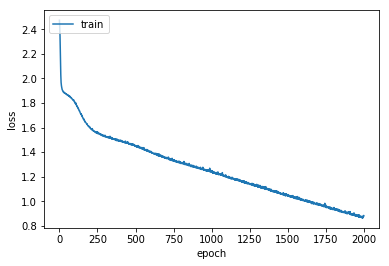

In [24]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 720us/step
acc: 66.00%


In [27]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [28]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'e8', 'g8', 'e8', 'g4', 'g8', 'e8', 'e4', 'e8', 'e4', 'e8', 'e8', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'g8', 'e8', 'd8', 'd8', 'e8', 'd8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3)

In [29]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'g4', 'e4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4', 'g4']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3)